In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
from scipy import optimize

## Line

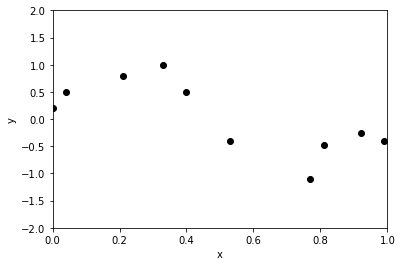

In [87]:
m = 10
xi = np.array([0.0,0.04,0.21,0.33,0.40,0.53,0.77,0.81,0.92,0.99])
yi = np.array([0.2,0.5,0.8,1,0.5,-0.4,-1.1,-0.47, -0.26,-0.4])
fi = np.sin(2*np.pi*xi)

plt.plot(xi,yi,'ko')
plt.ylim([-2,2])
plt.xlim([0,1])
plt.xlabel('x')
plt.ylabel('y')
plt.savefig('interpolate0.png')

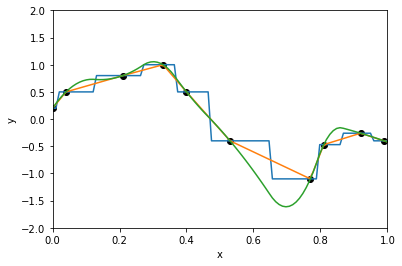

In [88]:
f0 = interpolate.interp1d(xi, yi, kind='nearest', fill_value='extrapolate')
f1 = interpolate.interp1d(xi, yi, kind='linear', fill_value='extrapolate')
f2 = interpolate.interp1d(xi, yi, kind='quadratic', fill_value='extrapolate')

x = np.linspace(0,1,100)
plt.plot(xi,yi,'ko')
plt.plot(x,f0(x),x,f1(x),x,f2(x))
plt.ylim([-2,2])
plt.xlim([0,1])
plt.xlabel('x')
plt.ylabel('y')
plt.savefig('interpolate1.png')

## Papaya

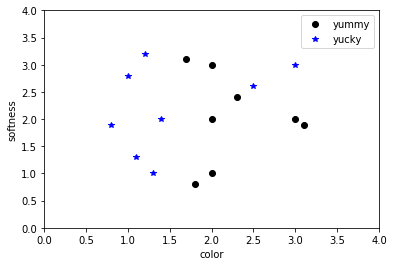

In [79]:
xi = np.array([[1.3,1.1,1.4,0.8,1,1.2,2,1.8,2,2.3,2,1.7,3,3.1,3,2.5],[1,1.3,2,1.9,2.8,3.2,1,0.8,2,2.4,3,3.1,2,1.9,3,2.6]])
yi = np.array([-1,-1,-1,-1,-1,-1,1,1,1,1,1,1,1,1,-1,-1])
yi==1
plt.plot(xi[0,yi==1],xi[1,yi==1],'ko',xi[0,yi==-1],xi[1,yi==-1],'b*')
plt.xlim([0,4])
plt.ylim([0,4])
plt.xlabel('color')
plt.ylabel('softness')
plt.legend(('yummy','yucky'))
plt.savefig('papaya0.png')


In [74]:
xx,yy = np.meshgrid(np.linspace(0,4,100),np.linspace(0,4,100))
f0 = interpolate.griddata(xi.T,yi,(xx,yy),method='nearest',fill_value=0)
f1 = interpolate.griddata(xi.T,yi,(xx,yy),method='linear',fill_value=0)
f2 = interpolate.Rbf(xi[0,:], xi[1,:], yi, epsilon=2)

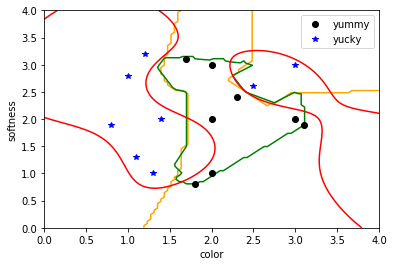

In [83]:
plt.plot(xi[0,yi==1],xi[1,yi==1],'ko',xi[0,yi==-1],xi[1,yi==-1],'b*')
plt.contour(xx,yy,f0,[0],colors='orange')
plt.contour(xx,yy,f1,[0],colors='green')
plt.contour(xx,yy,f2(xx,yy),[0],colors='red')

plt.xlabel('color')
plt.ylabel('softness')
plt.legend(('yummy','yucky'))
plt.savefig('papaya1.png')

## Loss functions

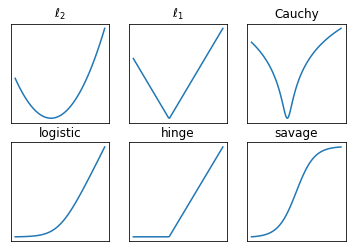

In [143]:
n = 100
f = np.linspace(-5,5,n)

l1 = lambda f,y : np.abs(f - y)
l2 = lambda f,y : (f - y)**2
cauchy = lambda f,y : np.log(1 + 5*(f - y)**2)

logistic = lambda f,y : np.log(1 + np.exp(-f*y))
hinge = lambda f,y : np.array([np.max([1 - y*f[i],0]) for i in range(len(f))])
savage = lambda f,y : 1/(1+np.exp(f*y))

y0 = -1
plt.subplot(231)
plt.plot(f,l2(f,y0))
plt.yticks([])
plt.xticks([])
plt.title('$\ell_2$')
plt.subplot(232)
plt.plot(f,l1(f,y0))
plt.title('$\ell_1$')
plt.yticks([])
plt.xticks([])
plt.subplot(233)
plt.plot(f,cauchy(f,y0))
plt.title('Cauchy')
plt.yticks([])
plt.xticks([])

plt.subplot(234)
plt.plot(f,logistic(f,y0))
plt.title('logistic')
plt.yticks([])
plt.xticks([])
plt.subplot(235)
plt.plot(f,hinge(f,y0))
plt.title('hinge')
plt.yticks([])
plt.xticks([])
plt.subplot(236)
plt.plot(f,savage(f,y0))
plt.title('savage')
plt.yticks([])
plt.xticks([])

plt.savefig('Loss.png')
plt.show()



## Regularizers

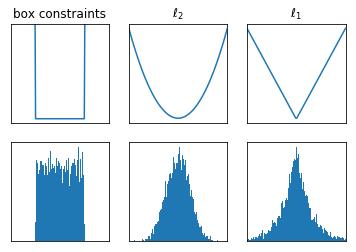

In [23]:
n = 100

w = np.linspace(-2,2,n)

box = lambda w : np.piecewise(w, [w < -1, w > 1], [10, 10,0])

plt.subplot(231)
plt.plot(w,.2 + box(w))
plt.title('box constraints')
plt.ylim([0,5])
plt.xlim([-2,2])
plt.yticks([])
plt.xticks([])

plt.subplot(232)
plt.plot(w,w**2)
plt.title('$\ell_2$')
plt.yticks([])
plt.xticks([])
plt.xlim([-2,2])

plt.subplot(233)
plt.plot(w,np.abs(w))
plt.title('$\ell_1$')
plt.yticks([])
plt.xticks([])
plt.xlim([-2,2])

plt.subplot(234)
plt.hist(2*np.random.rand(5000) - 1,w)
plt.yticks([])
plt.xticks([])
plt.xlim([-2,2])

plt.subplot(235)
plt.hist(0.5*np.random.randn(5000),w)
plt.yticks([])
plt.xticks([])
plt.xlim([-2,2])

plt.subplot(236)
plt.hist(np.random.laplace(0,.5,5000),w)
plt.yticks([])
plt.xticks([])
plt.xlim([-2,2])

plt.savefig('Regularizer.png')
plt.show()


## Defininig properties

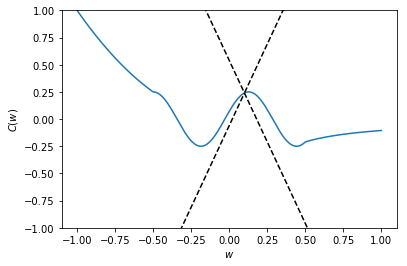

In [160]:
n = 500
w = np.linspace(-1,1,n)

C = lambda w : np.piecewise(w,[w<-0.5,w>.5],[lambda w : w**2,lambda w : (1/w/2)*0.25*np.cos(10),lambda w : 0.25*np.cos(10*(w+0.5))])

w0 = 0.1
rho = 3
plt.plot(w,C(w),w,C(w0) + rho*np.abs(w-w0),'k--',w,C(w0) - rho*np.abs(w-w0),'k--')
plt.ylim([-1,1])
plt.xlabel('$w$')
plt.ylabel('$C(w)$')
plt.savefig('Lipschitz.png')
plt.show()


In [4]:
w0 = -0.5
w1 = 0.75
plt.plot(w,w**2,[w0,w1],[w0**2,w1**2],'k-o')
plt.xlabel('$w$')
plt.ylabel('$C(w)$')
plt.savefig('Convex.png')
plt.show()


NameError: name 'w' is not defined

## Strong convexity

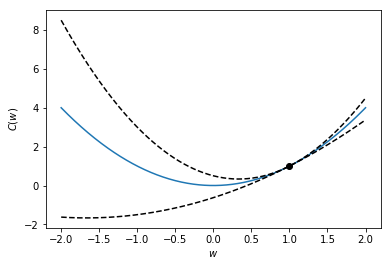

In [11]:
n = 500
w = np.linspace(-2,2,n)
plt.plot(w,w**2,w,1 + 2*(w-1) + 0.5*3*(w-1)**2,'k--',1,1,'ko',w,1 + 2*(w-1) + 0.5*0.75*(w-1)**2,'k--')
plt.xlabel('$w$')
plt.ylabel('$C(w)$')
plt.savefig('strongconvex.png')
plt.show()

## optimality

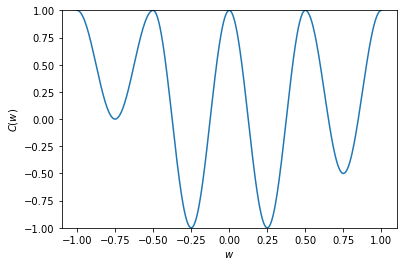

In [162]:
n = 500
w = np.linspace(-1,1,n)

C = lambda w : np.piecewise(w,[w<-0.5,w>.5],[lambda w :0.5+0.5*np.cos(4*np.pi*(w+0.5)),lambda w : 0.25+0.75*np.cos(4*np.pi*(w+0.5)),lambda w : np.cos(4*np.pi*(w+0.5))])

plt.plot(w,C(w))
plt.ylim([-1,1])
plt.xlabel('$w$')
plt.ylabel('$C(w)$')
plt.savefig('minima.png')
plt.show()

## Optimization

/opt/local/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in double_scalars


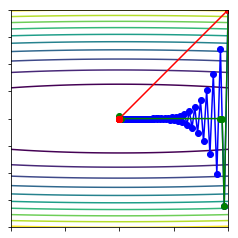

In [255]:
#f = lambda x,y : (1-x)**2 + 100*(y-x**2)**2
#df = lambda x,y : np.array([-2*(1-x) - 400*x*(y-x**2),200*(y-x**2)])
#ddf = lambda x,y : np.array([[2 - 400*y + 800*x, -400*x],[-400*x, 200]])

A = np.array([[2,0],[0,100]])
f = lambda x,y : A[0,0]*x**2 + (A[0,1]+A[1,0])*x*y + A[1,1]*y**2
df = lambda x,y : np.array([2*A[0,0]*x + (A[0,1]+A[1,0])*y, 2*A[1,1]*y + A[0,1]+A[1,0]*x])
ddf = lambda x,y : A + A.T

n = 100
alpha = 9e-3
w0 = [10,10]
ws = [0,0]

#
w1 = np.zeros((2,n))
e1 = np.zeros((2,n))
w1[0,0] = w0[0]
w1[1,0] = w0[1]
e1[0,0] = f(w1[0,0],w1[1,0])
e1[1,0] = np.linalg.norm(w1[:,0]-ws)

w2 = np.zeros((2,n))
e2 = np.zeros((2,n))
w2[0,0] = w0[0]
w2[1,0] = w0[1]
e2[0,0] = f(w2[0,0],w2[1,0])
e2[1,0] = np.linalg.norm(w2[:,0]-ws)
beta = alpha

w3 = np.zeros((2,n))
e3 = np.zeros((2,n))
w3[0,0] = w0[0]
w3[1,0] = w0[1]
e3[0,0] = f(w3[0,0],w3[1,0])
e3[1,0] = np.linalg.norm(w3[:,0]-ws)

for k in range(n-1):
    # steepest descent
    w1[:,k+1] = w1[:,k] - alpha*df(w1[0,k],w1[1,k])
    e1[0,k+1] = f(w1[0,k+1],w1[1,k+1]) - f(ws[0],ws[1])
    e1[1,k+1] = np.linalg.norm(w1[:,k+1]-ws)
    
    # BB
    if k > 0:
        sk = w2[:,k] -  w2[:,k-1]
        yk = df(w2[0,k],w2[1,k]) - df(w2[0,k-1],w2[1,k-1])
        beta = np.dot(sk,sk)/(np.dot(sk,yk))
    w2[:,k+1] = w2[:,k] - beta*df(w2[0,k],w2[1,k])
    e2[0,k+1] = f(w2[0,k+1],w2[1,k+1]) - f(ws[0],ws[1])
    e2[1,k+1] = np.linalg.norm(w2[:,k+1]-ws)
    
    # newton
    w3[:,k+1] = w3[:,k] - np.linalg.inv(ddf(w3[0,k],w3[1,k]))@df(w3[0,k],w3[1,k])
    e3[0,k+1] = f(w3[0,k+1],w3[1,k+1]) - f(ws[0],ws[1])
    e3[1,k+1] = np.linalg.norm(w3[:,k+1]-ws)
    
# plot
xx,yy=np.meshgrid(ws[0]+np.linspace(-10,10,100),ws[1]+np.linspace(-10,10,100))

C = f(xx,yy)

fig = plt.figure()

ax = fig.add_subplot(111)

ax.contour(xx,yy,C,10)
ax.plot(w1[0,:],w1[1,:],'b-o')
ax.plot(w2[0,:],w2[1,:],'g-o')
ax.plot(w3[0,:],w3[1,:],'r-o')
ax.set_aspect('equal')
ax.set_xticklabels(())
ax.set_yticklabels(())

plt.savefig('steepdescent.png')
#plt.subplot(132)
#plt.semilogy(e1[0,:]/e1[0,0],'b')
#plt.semilogy(e2[0,:]/e2[0,0],'g')
#plt.semilogy(e3[0,:]/e3[0,0],'r')


#plt.subplot(133)
#plt.semilogy(e1[1,:]/e1[1,0],'b')
#plt.semilogy(e2[1,:]/e2[1,0],'g')
#plt.semilogy(e3[1,:]/e3[1,0],'r')

## Proximal

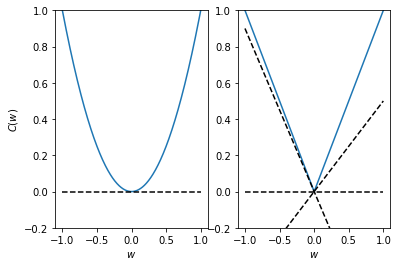

In [9]:
n = 500
w = np.linspace(-1,1,n)

plt.subplot(121)
plt.plot(w,w**2,w,0*w,'k--')
plt.xlabel('$w$')
plt.ylabel('$C(w)$')
plt.ylim([-0.2,1])

plt.subplot(122)
plt.plot(w,np.abs(w),w,0*w,'k--',w,0.5*w,'k--',w,-0.9*w,'k--')
plt.xlabel('$w$')
#plt.ylabel('$C(w)$')
plt.ylim([-0.2,1])

plt.savefig('optimality.png')
plt.show()

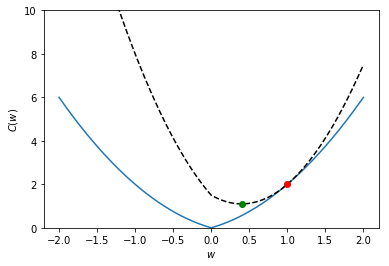

In [47]:
n = 500
w = np.linspace(-2,2,n)
w0 = 1
alpha = 0.2
w1 = w0 - alpha*2*w0
plt.plot(w,np.abs(w) + w**2,w,0.6+0.5*(1/alpha)*(w - w1)**2 + np.abs(w),'k--',w0,np.abs(w0)+w0**2,'ro', 0.4,1.1,'go')
plt.xlabel('$w$')
plt.ylabel('$C(w)$')
plt.ylim([0,10])
plt.savefig('proximal.png')
plt.show()

In [18]:
A = np.array([[.01,0],[0,.1]])
f = lambda x,y : A[0,0]*x**2 + (A[0,1]+A[1,0])*x*y + A[1,1]*y**2
df = lambda x,y : np.array([2*A[0,0]*x + (A[0,1]+A[1,0])*y, 2*A[1,1]*y + A[0,1]+A[1,0]*x])

g = lambda x,y : np.abs(x) + np.abs(y)
dg = lambda x,y : np.array([x/(np.abs(x) + 1e-16), y/(np.abs(y) + 1e-16)])

def prox(x,a):
    n = len(x)
    for k in range(n):
        if np.abs(x[k])>a:
            if x[k]>0:
                x[k] = x[k] - a
            else:
                x[k] = a - x[k]
        else:
            x[k] = 0
    return x
beta = 1
alpha = 1
#
w1 = np.zeros((2,n))
e1 = np.zeros((2,n))
w1[0,0] = -w0[0]
w1[1,0] = w0[1]
e1[0,0] = f(w1[0,0],w1[1,0]) + beta*g(w1[0,0],w1[1,0])
e1[1,0] = np.linalg.norm(w1[:,0]-ws)

w2 = np.zeros((2,n))
e2 = np.zeros((2,n))
w2[0,0] = w0[0]
w2[1,0] = w0[1]
e2[0,0] = f(w2[0,0],w2[1,0]) + beta*g(w2[0,0],w2[1,0])
e2[1,0] = np.linalg.norm(w2[:,0]-ws)


for k in range(n-1):
    # steepest descent
    w1[:,k+1] = w1[:,k] - alpha*(df(w1[0,k],w1[1,k]) + beta*dg(w1[0,k],w1[1,k]))
    e1[0,k+1] = f(w1[0,k+1],w1[1,k+1]) - f(ws[0],ws[1]) + beta*(g(w1[0,k+1],w1[1,k+1]) - g(ws[0],ws[1]))
    e1[1,k+1] = np.linalg.norm(w1[:,k+1]-ws)
    
    w2[:,k+1] = prox(w2[:,k] - alpha*df(w2[0,k],w2[1,k]),alpha*beta)
    e2[0,k+1] = f(w2[0,k+1],w2[1,k+1]) - f(ws[0],ws[1]) + beta*(g(w2[0,k+1],w2[1,k+1]) - g(ws[0],ws[1]))
    e2[1,k+1] = np.linalg.norm(w2[:,k+1]-ws)
#

# plot
xx,yy=np.meshgrid(ws[0]+np.linspace(-10,10,100),ws[1]+np.linspace(-10,10,100))

C = f(xx,yy) + beta*g(xx,yy)

fig = plt.figure()

ax = fig.add_subplot(111)

ax.contour(xx,yy,C,20)
ax.plot(w1[0,:],w1[1,:],'b-o')
ax.plot(w2[0,:],w2[1,:],'g-o')
ax.set_aspect('equal')
ax.set_xticklabels(())
ax.set_yticklabels(())

plt.savefig('proxgradient.png')


TypeError: 'float' object is not subscriptable

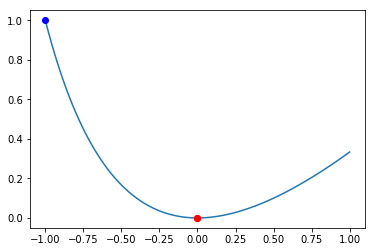

In [8]:
t = np.linspace(-1,1,100)
f = lambda x : x**2/(2 + x)
g = lambda x : (2*x(2+x) - x**2)/(2+x)**2

t0 = -1
t1 = 0
t2 = 0

plt.plot(t,f(t))
plt.plot(t0,f(t0),'bo')
plt.plot(t1,f(t1),'ro',label='exact')
plt.plot(0,0,'ro',label='exact')


## Bias-variance

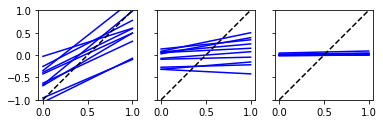

In [182]:
m = 10
n = 100

xi = np.array([0.0,0.04,0.21,0.33,0.40,0.53,0.77,0.81,0.92,0.99])
x  = np.linspace(0,1,n)
fi = 2*xi -1

fig = plt.figure()

ax1 = fig.add_subplot(131)

alpha = 1
f = np.zeros((10,n))
for k in range(10):
    yi = fi + np.random.randn(m)
    
    A = np.array([xi**0,xi**1])
    c = np.linalg.solve(A@A.T + alpha*np.eye(2),A@yi)
    f[k] = c[0] + c[1]*x
    ax1.plot(x,f[k],'b')

ax1.plot(x,2*x-1,'k--')
ax1.set_ylim((-1,1))
ax1.set_aspect(0.5)
ax2 = fig.add_subplot(132)
alpha = 10
f = np.zeros((10,n))
for k in range(10):
    yi = fi + np.random.randn(m)
    
    A = np.array([xi**0,xi**1])
    c = np.linalg.solve(A@A.T + alpha*np.eye(2),A@yi)
    f[k] = c[0] + c[1]*x
    ax2.plot(x,f[k],'b')

ax2.plot(x,2*x-1,'k--')
ax2.set_ylim((-1,1))
ax2.set_aspect(aspect=0.5)
ax2.set_yticklabels([])

ax3 = fig.add_subplot(133)
alpha = 100
f = np.zeros((10,n))
for k in range(10):
    yi = fi + np.random.randn(m)
    
    A = np.array([xi**0,xi**1])
    c = np.linalg.solve(A@A.T + alpha*np.eye(2),A@yi)
    f[k] = c[0] + c[1]*x
    ax3.plot(x,f[k],'b')

ax3.plot(x,2*x-1,'k--')
ax3.set_ylim((-1,1))
ax3.set_aspect(aspect=0.5)
ax3.set_yticklabels([])

plt.savefig('biasvariance.png')

## Pareto

## Vanishing gradient

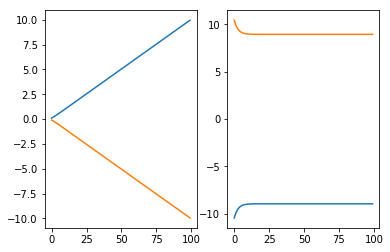

In [108]:
n = 100
h = 0.1

#sigma = lambda s : 1/(1 + np.exp(-1*s))
sigma = lambda s : np.tanh(s)
dsigma = lambda s : 1 - sigma(s)**2

W = np.array([[2,0],[0,2]])
#W = np.array([[0,1],[-1,0]])
#W = np.array([[-2,0],[0,-2]])

b = np.array([1,-1])
y = np.array([1,-1])

x0 = np.array([.1,-.1])

z = np.zeros((n,2))
x = np.zeros((n,2))

x[0] = x0

for k in range(n-1):
    x[k+1] = x[k] + h*sigma(W@x[k] + b1)


z[n-1] = y - x[n-1]

for k in range(n-1,0,-1):
    z[k-1] = z[k] + h*W.T@(dsigma(W@x[k] + b)*z[k])

#
plt.subplot(121)
plt.plot(x[:,0])
plt.plot(x[:,1])

plt.subplot(122)
plt.plot(z[:,0])
plt.plot(z[:,1])

In [98]:
sigma(W@x[0] + b)

array([-0.76159416,  0.76159416])

## Stochastic optimization

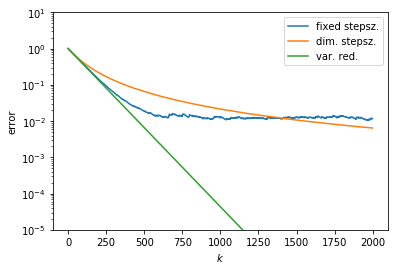

In [99]:
n = 2000
L = 1e1
mu = 1e-1
sigma = 0.05

e1 = np.ones(n)
e2 = np.ones(n)
e3 = np.ones(n)
e4 = np.ones(n)
for k in range(n-1):
    alpha1 = 1/L
    alpha2 = 1e1/(k + 1e2)
    alpha3 = 1/L
    
    E1 = sigma*np.random.randn()
    E2 = sigma*np.random.randn()
    E3 = (sigma*0.5**k)*np.random.randn()
    
    e1[k+1] = (1-2*mu*alpha1 + mu*L*alpha1**2)*e1[k] + 0.5*L*(alpha1*E1)**2
    e2[k+1] = (1-2*mu*alpha2 + mu*L*alpha2**2)*e2[k] + 0.5*L*(alpha2*E2)**2
    e3[k+1] = (1-2*mu*alpha3 + mu*L*alpha3**2)*e3[k] + 0.5*L*(alpha3*E3)**2

    
fig = plt.figure()

k = np.linspace(1,n,n)
ax = fig.add_subplot(111)

ax.semilogy(e1)
ax.semilogy(e2)
ax.semilogy(e3)
ax.legend(('fixed stepsz.','dim. stepsz.','var. red.'))
ax.set_xlabel('$k$')
ax.set_ylabel('error')
ax.set_ylim([1e-5,10])
plt.savefig('stochastic.png')

## Visualization

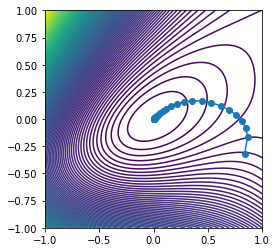

In [13]:
n = 7
niter = 100
alpha  = 1e-3
sigma = 0

f = lambda x : optimize.rosen(x)
g = lambda x : optimize.rosen_der(x)

x = np.zeros((niter,n))
x[0] = np.array([.1,1,1,1,1,1,1])

for k in range(niter-1):
    x[k+1] = x[k] - alpha*g(x[k]) + sigma*np.random.randn(n)
    
M = x - x[-1]
U,S,Vt = np.linalg.svd(M.T)

dx,dy=np.meshgrid(np.linspace(-1,1,100),np.linspace(-1,1,100))

ft = np.zeros((100,100))
for k in range(100):
    for l in range(100):
        ft[k,l] = f(x[-1] + dx[k,l]*U[:,0] + dy[k,l]*U[:,1])

fig = plt.figure()

ax = fig.add_subplot(111)
ax.contour(dx,dy,ft,200)
ax.plot((x-x[-1])@U[:,0],(x-x[-1])@U[:,1],'o-')
#ax.set_xlim([-2,2])
ax.set_aspect('equal')

plt.savefig('visual.png')